In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("../data/location_rev.csv")
df.head()

,revenue,num_competitors,median_income,num_loyalty_members,population_density,location_age
0,42247.80,3.0,30527.57,1407.0,3302.0,12.0
1,38628.37,3.0,30185.49,1025.0,4422.0,11.0
2,39715.16,1.0,32182.24,1498.0,3260.0,12.0
3,35593.30,5.0,29728.65,2340.0,4325.0,10.0
4,35128.18,4.0,30691.17,847.0,3774.0,11.0


In [4]:
df.describe()

,revenue,num_competitors,median_income,num_loyalty_members,population_density,location_age
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,38433.469330,3.397000,31360.668500,1597.200000,3351.199000,11.041000
std,11665.825242,1.016082,3943.278358,496.874663,975.664263,3.034885
min,5000.000000,0.000000,20000.000000,0.000000,0.000000,0.000000
25%,30277.897500,3.000000,28792.592500,1253.000000,2689.250000,9.000000
50%,38323.095000,3.000000,31134.555000,1605.000000,3353.000000,11.000000
75%,45894.670000,4.000000,34050.992500,1925.250000,4017.000000,13.000000
max,79342.070000,7.000000,43676.900000,3280.000000,6489.000000,24.000000


# Multiple Linear Regression

In [5]:
from sklearn.model_selection import train_test_split
df.corr()

,revenue,num_competitors,median_income,num_loyalty_members,population_density,location_age
revenue,1.000000,-0.156685,0.601888,0.173432,0.311653,0.552773
num_competitors,-0.156685,1.000000,-0.018398,-0.027283,0.035768,0.053796
median_income,0.601888,-0.018398,1.000000,0.011891,-0.041697,0.045621
num_loyalty_members,0.173432,-0.027283,0.011891,1.000000,-0.028611,0.036016
population_density,0.311653,0.035768,-0.041697,-0.028611,1.000000,-0.009977
location_age,0.552773,0.053796,0.045621,0.036016,-0.009977,1.000000


In [6]:
X = df[['num_competitors',
        'median_income',
        'population_density', 
        'num_loyalty_members',
       'location_age'
       ]] # inputs
y = df['revenue'] # output

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 100)

In [8]:
# Chuẩn hóa dữ liệu
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test =  scaler.transform(X_test)

# Tạo đối tượng linear regression cho học trên tập train

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

# Thực hiện các bước đánh giá mô hình

# Dùng các đại lượng thống kê

In [11]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
y_pred = model.predict(X_test)
r2 = r2_score(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
print(r2, mse, mae )

0.8210733500078612 23181637.891943768 3930.4052290167597


# Vẽ biểu đồ

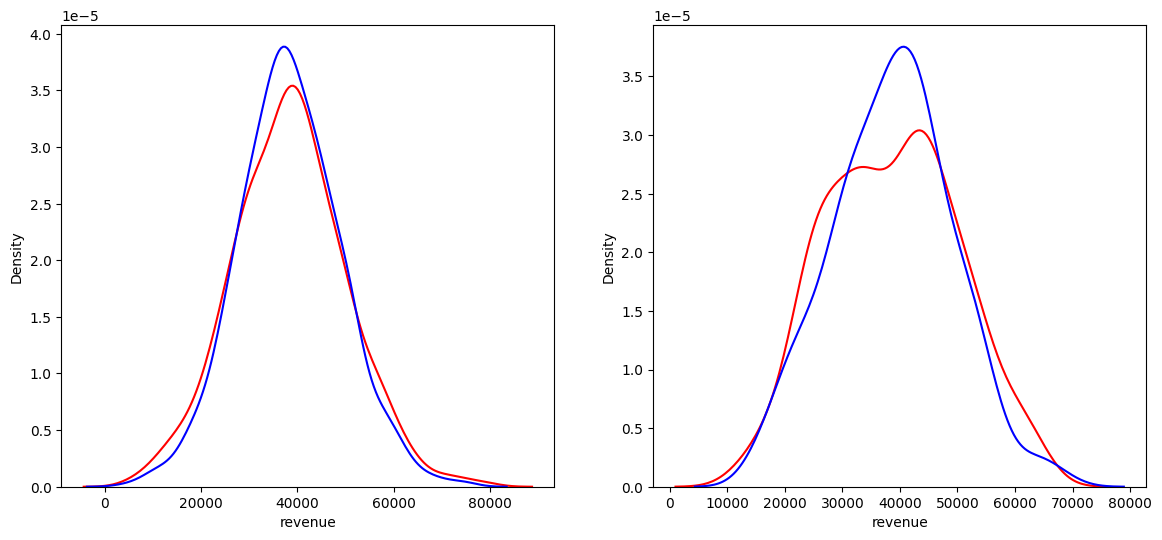

In [20]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
ax1 = sns.distplot(y_train, hist=False, color="r", 
                   label="Actual Train Values")
sns.distplot(model.predict(X_train), hist=False, color="b", 
             label="Predicted Train Values", ax=ax1)
plt.subplot(1,2,2)
ax2 = sns.distplot(y_test, hist=False, color="r", 
                   label="Actual Test Values")
sns.distplot(model.predict(X_test), hist=False, color="b", 
             label="Predicted Test Values" , ax=ax2)
plt.show()

In [12]:
from sklearn.ensemble import AdaBoostRegressor

In [14]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

# Create a weak learner
wlearner = DecisionTreeRegressor()

# Create the AdaBoost Regressor with the weak learner as the base estimator
ada_model = AdaBoostRegressor(estimator=wlearner)


In [15]:
ada_model.fit(X_train,y_train)

AdaBoostRegressor(estimator=DecisionTreeRegressor())

In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
y_pred = ada_model.predict(X_test)
r2 = r2_score(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
print(f" r2: {r2} \n mse: {mse} \n mae: {mae}")

 r2: 0.730582698710465 
 mse: 34905556.665779606 
 mae: 4968.38588
